In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [46]:
global M,N,A,B,C,f0,x00


def matvec(A,B,C,x):
    xN = x.shape[1]
    res = x.copy()
    for i in range(1,xN-1):
        res[:,i] = A[:,:,i].dot(x[:,i])+B[:,:,i-1].dot(x[:,i-1])+C[:,:,i].dot(x[:,i+1])
    res[:,0] = A[:,:,0].dot(x[:,0])+C[:,:,0].dot(x[:,1])
    res[:,-1] = B[:,:,-1].dot(x[:,-2])+A[:,:,-1].dot(x[:,-1])
    return res

def generate_problem(grid,x):
    global M,N,A,B,C,f0
    f = x.copy()
    for i in range(x.shape[1]):
        for j in range(x.shape[0]):
            f[j,i] = np.exp(x[j,i])
    J = np.zeros((M,M,N))
    for i in range(N):
        for j in range(M):
            J[j][j][i] = np.exp(x[j][i])
    return A,B,C,J,-f0+f

def solve_linear(A,B,C,d):
    x = np.empty(d.shape,dtype= np.float64)
    xN = x.shape[1]
    Y = np.empty(d.shape,dtype= np.float64)
    gamma = np.empty(C.shape,dtype= np.float64)
    ialpha= np.linalg.inv(A[:,:,0])
    gamma[:,:,0] = ialpha.dot(C[:,:,0])
    Y[:,0] = ialpha.dot(d[:,0])
    for i in range(1,xN-1):
        ialpha = np.linalg.inv(A[:,:,i]-B[:,:,i-1].dot(gamma[:,:,i-1]))
        gamma[:,:,i] = ialpha.dot(C[:,:,i])
        Y[:,i] = ialpha.dot(d[:,i]-B[:,:,i-1].dot(Y[:,i-1]))

    ialpha = np.linalg.inv(A[:,:,xN-1]-B[:,:,xN-2].dot(gamma[:,:,xN-2]))
    Y[:,xN-1] = ialpha.dot(d[:,xN-1]-B[:,:,xN-2].dot(Y[:,xN-2]))
    x[:,xN-1] = Y[:,xN-1]
    for i in reversed(range(xN-1)):
        x[:,i] = Y[:,i]-gamma[:,:,i].dot(x[:,i+1])
    return x

def calc_residual(A,B,C,d,x):
    return -d

#solve func(x) = r
#jac = A+J,B,C tridiag block matrix A+J - main,B - lo diag ,  C - uppper diag
def newton_solver(A,B,C,J,func0,x0,grid,r,eps = 1e-8, max_iter = 100):
    x = x0.copy()
    func = func0.copy()
    for i in range(max_iter):
        dx = solve_linear(A+J,B,C,-(func-r))
        x+=dx
        A,B,C,J,func = generate_problem(grid,x)
        resid = calc_residual(A,B,C,func-r,x)
        if(np.abs(resid).mean() < eps):
            break
    return A,B,C,J,func,x,resid

In [47]:
N = 3
M = 3 #in block
np.random.seed(0) 
B = np.random.rand(M,M,N)
C = np.random.rand(M,M,N)
C[:,:,0] = 0
A = np.random.rand(M,M,N)
A[:,:,-1] = 0
x00 = np.random.rand(M,N).astype(np.float64)
f0 = np.zeros_like(x00)
A,B,C,J,f00 = generate_problem(None,x00)


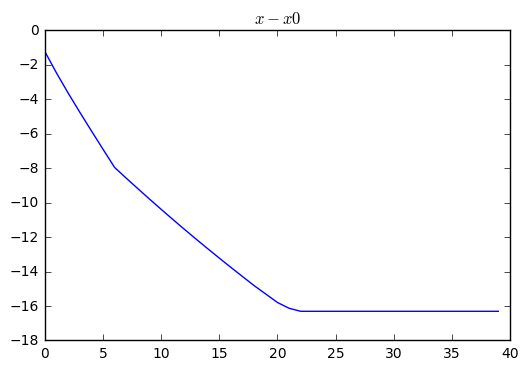

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: RuntimeWarning: divide by zero encountered in log10


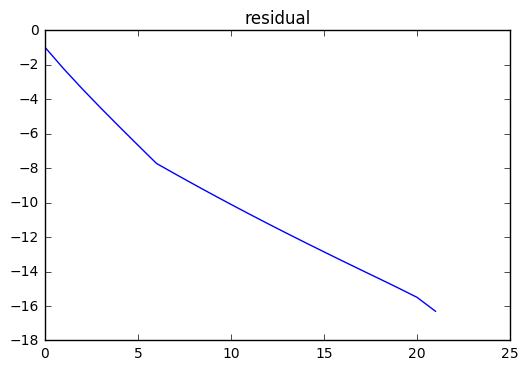

In [51]:



N = 3
M = 3 #in block
np.random.seed(0)
B = np.zeros((M,M,N-1))#np.random.rand(M,M,N)
C = np.zeros((M,M,N-1))#np.random.rand(M,M,N)
C[:,:,0] = 0
A = np.zeros((M,M,N))#np.random.rand(M,M,N)
for i in range(N):
    A[:,:,i] = np.eye(M)

x00 = np.random.rand(M,N).astype(np.float64)
f0 = np.zeros_like(x00)
A,B,C,J,f00 = generate_problem(None,x00)
f0 = f00


import matplotlib.pyplot as plt

x= np.zeros((M,N), dtype=np.float64)
A,B,C,J,d = generate_problem(None,x)

err = []
ee = []
it = []


for i in range(40):
    _,_,_,_,d,x,r = newton_solver(A, B, C, J, d, x, None, np.zeros_like(x),max_iter = 2)
    ee.append(np.abs(r).mean())
    err.append(np.abs(x-x00).mean())
    it.append(i)


plt.title('$x-x0$')
plt.plot(it,np.log10(np.array(err)))
plt.show()


plt.title('residual')
plt.plot(it,np.log10(np.array(ee)))
plt.show()
    